Section 1: Lagrange Polynomial Interpolation

One technique for determining a polynomial that precisely traverses a given set of points is Lagrange Polynomial Interpolation. Consider that you need to estimate the values in between a set of known values from an experiment or function. A smooth polynomial that fits all of the provided points is created with the use of Lagrange interpolation.

Lagrange interpolation's fundamental concept is to construct a polynomial by joining smaller "basis" polynomials, each of which adds to a particular point. Every basis polynomial is intended to be 0 at every other point and 1 at the matching data point. This guarantees that the interpolated polynomial precisely fits the provided data since only one of these basis polynomials makes a substantial contribution to the evaluation of the final polynomial for any given input from our dataset.

To better understand this, imagine you have three points on a graph. Instead of trying to directly construct a polynomial that passes through all three at once, Lagrange interpolation builds smaller polynomials-one for each point. Each of these smaller polynomials is structured in such a way that when combined, they create the desired polynomial. Think of it like creating a melody where each note contributes to the final tune but is structured so that it harmonizes with the rest.




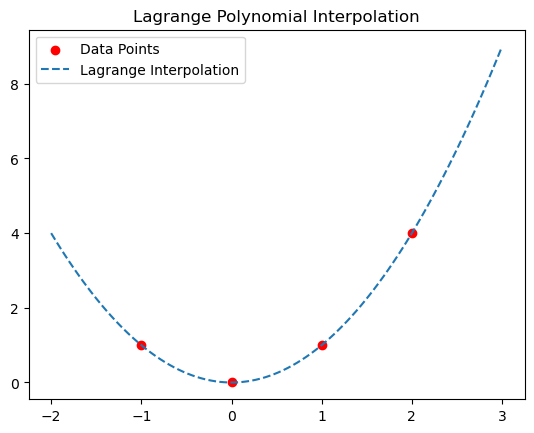

In [1]:
## Python implementation using Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Lagrange basis polynomial
def lagrange_basis(x, x_points, i):
    term = 1
    for j in range(len(x_points)):
        if i != j:
            term *= (x - x_points[j]) / (x_points[i] - x_points[j])
    return term

# Function to compute Lagrange polynomial interpolation
def lagrange_interpolation(x, x_points, y_points):
    result = 0
    for i in range(len(x_points)):
        result += y_points[i] * lagrange_basis(x, x_points, i)
    return result

# Given data points
x_points = np.array([-1, 0, 1, 2])
y_points = np.array([1, 0, 1, 4])

# Generate interpolated values
x_vals = np.linspace(-2, 3, 100)
y_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Plot the results
plt.scatter(x_points, y_points, color='red', label="Data Points")
plt.plot(x_vals, y_vals, label="Lagrange Interpolation", linestyle="--")
plt.legend()
plt.title("Lagrange Polynomial Interpolation")
plt.show()


Section 2: Newton's Polynomial Interpolation

Newton’s Polynomial Interpolation is another method used to find a polynomial that exactly passes
through a given set of points. Unlike Lagrange interpolation, which requires recalculating the 
entire polynomial when adding new points, Newton’s method builds the polynomial incrementally, 
making it more efficient when new data points need to be added. This makes it particularly useful
in cases where data is collected over time, and interpolation needs to be updated dynamically.

The key idea behind Newton’s interpolation is to express the polynomial as a sum of progressively
complex terms. Instead of relying on basis polynomials like Lagrange interpolation, Newton’s meth
od constructs the polynomial using a divided difference table, which captures how the function 
values change between points. This approach ensures that as more points are added, previous 
calculations can be reused rather than recalculating everything from scratch.

To illustrate this, imagine you are trying to approximate a function based on three known points.
Newton’s method first determines how steeply the values change between each pair of points 
(first-order differences). Then, it looks at how these changes themselves vary between points 
(second-order differences), and so on. This step-by-step approach allows Newton’s interpolation 
to systematically construct the polynomial in a way that captures the underlying trend of the 
data while keeping computations manageable.

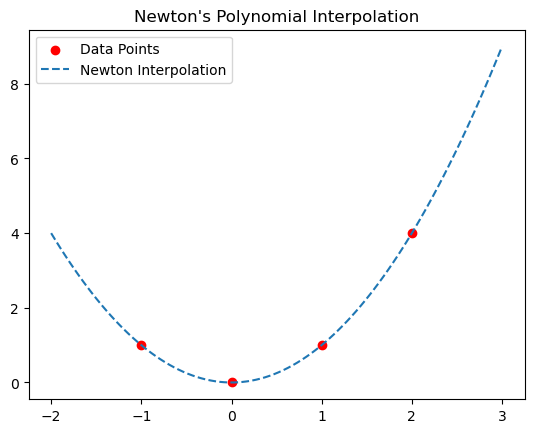

In [2]:
## Below is a Python implementation of Newton's interpolation

# Function to compute divided differences
def divided_differences(x_points, y_points):
    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_points[i+j] - x_points[i])

    return coef[0]  # Return only the first row (coefficients)

# Function to compute Newton's interpolation polynomial
def newton_interpolation(x, x_points, coef):
    n = len(x_points)
    result = coef[0]
    product = 1
    for i in range(1, n):
        product *= (x - x_points[i-1])
        result += coef[i] * product
    return result

# Given data points
x_points = np.array([-1, 0, 1, 2])
y_points = np.array([1, 0, 1, 4])

# Compute divided difference coefficients
coef = divided_differences(x_points, y_points)

# Generate interpolated values
x_vals = np.linspace(-2, 3, 100)
y_vals = [newton_interpolation(x, x_points, coef) for x in x_vals]

# Plot the results
plt.scatter(x_points, y_points, color='red', label="Data Points")
plt.plot(x_vals, y_vals, label="Newton Interpolation", linestyle="--")
plt.legend()
plt.title("Newton's Polynomial Interpolation")
plt.show()